In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
pu = '#800080'
gr = '#017270'

In [3]:
#/Users/kewang/Desktop/ECE143
#location = '/ece143_fa19_bazhou_Varun_Angela_Frank/'
location = './Craigslist_data/'

In [4]:
df_23 = pd.read_csv(location + "Craigslist_iphone 2019-11-23.csv")
df_24 = pd.read_csv(location + "Craigslist_iphone 2019-11-24.csv")
df_25 = pd.read_csv(location + "Craigslist_iphone 2019-11-25.csv")
df_26 = pd.read_csv(location + "Craigslist_iphone 2019-11-26.csv")
df_27 = pd.read_csv(location + "Craigslist_iphone 2019-11-27.csv")
df_28 = pd.read_csv(location + "Craigslist_iphone 2019-11-28.csv")
df_29 = pd.read_csv(location + "Craigslist_iphonex-1129.csv")

df_list_ipx = [df_23, df_24, df_25, df_26, df_27, df_28, df_29]

In [5]:
df_23 = pd.read_csv(location + "Craigslist_samsung 11.23.csv")
df_24 = pd.read_csv(location + "Craigslist_samsung 2019-11-24.csv")
df_25 = pd.read_csv(location + "Craigslist_samsung 2019-11-25.csv")
df_26 = pd.read_csv(location + "Craigslist_samsung 2019-11-26.csv")
df_27 = pd.read_csv(location + "Craigslist_samsung 2019-11-27.csv")
df_28 = pd.read_csv(location + "Craigslist_samsung 2019-11-28.csv")
df_29 = pd.read_csv(location + "Craigslist_samsungS8-1129.csv")

df_list_ss = [df_23, df_24, df_25, df_26, df_27, df_28, df_29]

# Plot 1: average price per day, two websites

In [7]:
from process_offerup import csv_process_A
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './'
files = os.listdir(path)
files.sort(reverse=True)
compare_avg_list = []
useful_ratio_list = []
newpost_list = []
dist_tuple_list = []
avg_week_list = []
cond_tuple_list = []
for file in files:
    if file.split('_')[0] == 'A':
        ModelName = file.split('_')[2]
        avg_ratio_useful, newly_per_day_list, dist_tuple, avg_per_week, cond_tuple = csv_process_A(path + file, ModelName)
        
        useful_ratio_list.append(avg_ratio_useful)
        newpost_list.append(newly_per_day_list)
        dist_tuple_list.append(dist_tuple)
        avg_week_list.append(avg_per_week)
        cond_tuple_list.append(cond_tuple)

In [8]:
def meanPrice(dt):
    '''
    remove items with price range 100-1000 then find average price
    param: pd.dataframe
    return: float
    '''
    price = dt.Price
    price = price[(price <= 700)]
    price = price[(price >= 200)]
    
    return price.mean()

In [131]:
mean_cl = []
for df in df_list_ipx:
    mean_cl.append(meanPrice(df))

In [132]:
ou = pd.read_csv("./AvgPrice_per_day_A_IPhone.csv")
mean_ou = []
for i in range(7):
    mean_ou.append(ou['AveragePrice'][i])

In [133]:
pricePerDayCL = mean_cl # mean price list for craigslist
pricePerDayOU = mean_ou # mean price list for OfferUp

In [134]:
sum(mean_cl)/7

445.4498902677416

In [135]:
sum(mean_ou)/7

517.8084673200335

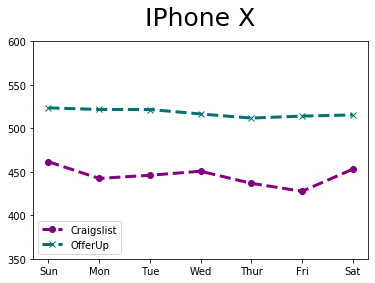

In [136]:
fig = plt.figure()
plt.plot(pricePerDayCL, color = pu, marker = 'o', linestyle='dashed',linewidth = 3.0, label = 'Craigslist')
plt.plot(pricePerDayOU, color = gr, marker = 'x', linestyle='dashed',linewidth = 3.0, label = 'OfferUp')

plt.title('IPhone X',fontdict = {'fontsize' : 25},pad=16) # change model name
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
axes = plt.gca()
axes.legend(loc = 'lower left')
axes.set_ylim([350,600])
plt.savefig('avg_per_day_ip',dpi=300)
plt.show()

In [137]:
def meanPrice(dt):
    '''
    remove items with price range 100-1000 then find average price
    param: pd.dataframe
    return: float
    '''
    price = dt.Price
    price = price[(price <= 600)]
    price = price[(price >= 200)]
    
    return price.mean()

In [138]:
mean_list = []
for df in df_list_ss:
    mean_list.append(meanPrice(df))

In [139]:
ou = pd.read_csv("./AvgPrice_per_day_A_Samsung.csv")
mean_ou = []
for i in range(7):
    mean_ou.append(ou['AveragePrice'][i])

In [140]:
pricePerDayCL = mean_list # mean price list for craigslist
pricePerDayOU = mean_ou # mean price list for OfferUp
print(sum(mean_list)/7)
print(sum(mean_ou)/7)

321.1419393132747
260.94029235839844


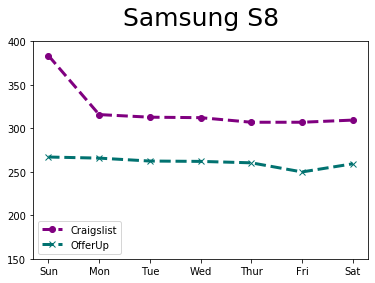

In [141]:
fig = plt.figure()
plt.plot(pricePerDayCL, color = pu, marker = 'o', linestyle='dashed', linewidth = 3.0, label = 'Craigslist')
plt.plot(pricePerDayOU, color = gr, marker = 'x', linestyle='dashed',linewidth = 3.0, label = 'OfferUp')
axes = plt.gca()
axes.set_ylim([150,400])
plt.title('Samsung S8',fontdict = {'fontsize' : 25},pad=16) # change model name
plt.xticks([0,1,2,3,4,5,6],['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
plt.legend(loc = 'lower left')
plt.savefig('avg_per_day_ss',dpi=300)
plt.show()

# Plot 2: 
# Bar chart - average price per condition, one website
# Pie chart - proportion per condition

In [175]:
cd_count = defaultdict(int)
cd_total = defaultdict(float)

for df in df_list_ipx:

    t1 = df[(df.Price >= 200)]
    t2 = t1[(t1.Price <= 700)] #removing items with price out of range
    cd = t2.groupby('Attributes')
    for condition in cd.groups:
        cd_count[condition] += len(cd.groups[condition])
        cd_total[condition] += df.Price[cd.groups[condition]].sum()
        

Unknown_avg = cd_total['Unknown']/cd_count['Unknown']

new_avg = cd_total['new']/cd_count['new']
like_new_avg = cd_total['like new']/cd_count['like new']
good_avg = cd_total['good']/cd_count['good']
excellent_avg = cd_total['excellent']/cd_count['excellent']

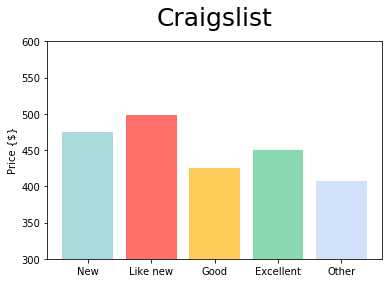

In [176]:
labels = ['New', 'Like new', 'Good', 'Excellent', 'Other'] #conditions
price_means_CL = [new_avg, like_new_avg, good_avg, excellent_avg, Unknown_avg] #average price per condition

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure()
plt.bar(x, price_means_CL, color = ['#a8dadc','#ff6f69', '#ffcc5c', '#88d8b0', '#d0e1f9']) # use gr for CL and bl for OU
#this color should be in alignment with the pie char in the next cell
axes = plt.gca()
axes.set_ylim([300,600])

plt.title('Craigslist',fontdict = {'fontsize' : 25},pad=16)
plt.xticks(x, labels)
plt.ylabel('Price {$}')
plt.savefig('avg_cond_CL_ipx',dpi=300)
plt.show()

# Corresponding pie chart

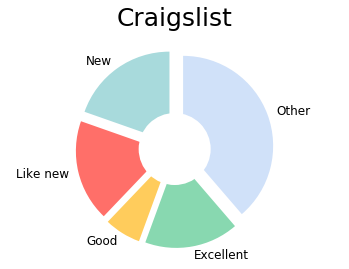

In [177]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'New', 'Like new', 'Good', 'Excellent', 'Other'
sizes = [cd_count['new'], cd_count['like new'], cd_count['good'], cd_count['excellent'], cd_count['Unknown']]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = ['#a8dadc','#ff6f69', '#ffcc5c', '#88d8b0', '#d0e1f9'],
         startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Craigslist',fontdict = {'fontsize' : 25},pad=16)
plt.savefig('cond_CL_ipx',dpi=300) 
plt.show()

In [178]:
cd_count = defaultdict(int)
cd_total = defaultdict(float)

for df in df_list_ss:

    t1 = df[(df.Price >= 200)]
    t2 = t1[(t1.Price <= 600)] #removing items with price out of range
    cd = t2.groupby('Attributes')
    for condition in cd.groups:
        cd_count[condition] += len(cd.groups[condition])
        cd_total[condition] += df.Price[cd.groups[condition]].sum()
        

Unknown_avg = cd_total['Unknown']/cd_count['Unknown']

new_avg = cd_total['new']/cd_count['new']
like_new_avg = cd_total['like new']/cd_count['like new']
good_avg = cd_total['good']/cd_count['good']
excellent_avg = cd_total['excellent']/cd_count['excellent']

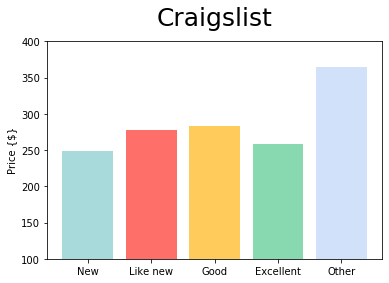

In [179]:
labels = ['New', 'Like new', 'Good', 'Excellent', 'Other'] #conditions
price_means_CL = [new_avg, like_new_avg, good_avg, excellent_avg, Unknown_avg] #average price per condition

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure()
plt.bar(x, price_means_CL, color = ['#a8dadc','#ff6f69', '#ffcc5c', '#88d8b0', '#d0e1f9']) # use gr for CL and bl for OU
#this color should be in alignment with the pie char in the next cell
axes = plt.gca()
axes.set_ylim([100,400])

plt.title('Craigslist',fontdict = {'fontsize' : 25},pad=16)
plt.xticks(x, labels)
plt.ylabel('Price {$}')
plt.savefig('avg_cond_CL_ss',dpi=300)
plt.show()

# Corresponding pie chart

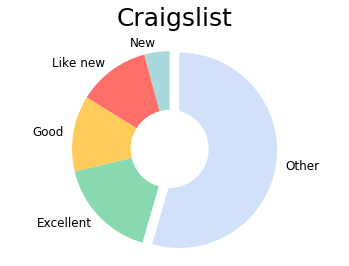

In [180]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'New', 'Like new', 'Good', 'Excellent', 'Other'
sizes = [cd_count['new'], cd_count['like new'], cd_count['good'], cd_count['excellent'], cd_count['Unknown']]
explode = (0, 0, 0, 0, 0.1)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion


fig1, ax1 = plt.subplots()
#autopct='%1.1f%%',
ax1.pie(sizes, explode=explode, labels=labels, colors = ['#a8dadc','#ff6f69', '#ffcc5c', '#88d8b0', '#d0e1f9'],
         startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Craigslist',fontdict = {'fontsize' : 25},pad=16)
plt.savefig('cond_CL_ss',dpi=300)
plt.show()

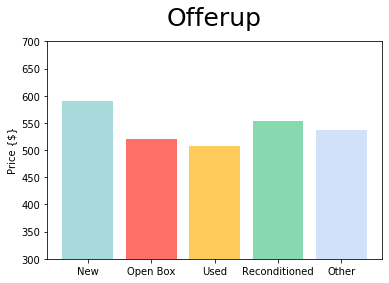

In [143]:
labels = ['New','Open Box','Used','Reconditioned','Other']
avg_ip = pd.read_csv('AvgPrice_condition_A_IPhone.csv')
price_means_OU = avg_ip.squeeze().tolist()
tmp = price_means_OU[2]
price_means_OU[2] = price_means_OU[4]
price_means_OU[4] = tmp
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure()
plt.bar(x, price_means_OU, color = ['#a8dadc','#ff6f69', '#ffcc5c', '#88d8b0', '#d0e1f9']) # use gr for CL and bl for OU
#this color should be in alignment with the pie char in the next cell
plt.ylim([300, 700])
plt.ylabel('Price {$}')
plt.title('Offerup',fontdict = {'fontsize' : 25},pad=16)
plt.xticks(x, labels)
plt.savefig('avg_cond_OU_ip',dpi=300)
plt.show()

# Corresponding pie chart

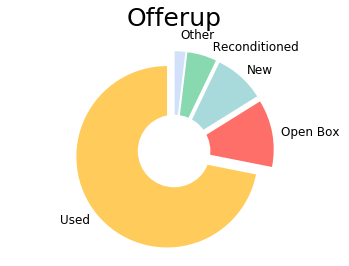

In [145]:
labels = ['Used','Open Box','New','  Reconditioned','Other\n']
sizes = cond_tuple_list[1][0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion


fig1, ax1 = plt.subplots()
#autopct='%1.1f%%',
ax1.pie(sizes, explode=explode, labels=labels, colors = ['#ffcc5c','#ff6f69', '#a8dadc', '#88d8b0', '#d0e1f9'],
         startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Offerup',fontdict = {'fontsize' : 25},pad=16)
plt.savefig('cond_OU_ip',dpi=300)
plt.show()

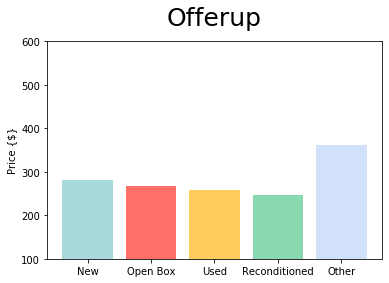

In [146]:
labels = ['New','Open Box','Used','Reconditioned','Other']
avg_sam = pd.read_csv('AvgPrice_condition_A_Samsung.csv')
price_means_OU = avg_sam.squeeze().tolist()
tmp = price_means_OU[2]
price_means_OU[2] = price_means_OU[4]
price_means_OU[4] = tmp
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig = plt.figure()
plt.bar(x, price_means_OU, color = ['#a8dadc','#ff6f69', '#ffcc5c', '#88d8b0', '#d0e1f9']) # use gr for CL and bl for OU
#this color should be in alignment with the pie char in the next cell
plt.ylim([100, 600])
plt.ylabel('Price {$}')
plt.title('Offerup',fontdict = {'fontsize' : 25},pad=16)
plt.xticks(x, labels)
plt.savefig('avg_cond_OU_ss',dpi=300)
plt.show()

# Corresponding pie chart

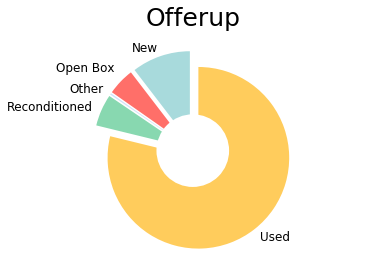

In [147]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['New','Open Box\n','Other','Reconditioned','Used']
sizes = cond_tuple_list[0][0]
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion


fig1, ax1 = plt.subplots()
#autopct='%1.1f%%',
ax1.pie(sizes, explode=explode, labels=labels, colors = ['#a8dadc','#ff6f69', '#d0e1f9', '#88d8b0', '#ffcc5c'],
         startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Offerup',fontdict = {'fontsize' : 25},pad=16)
plt.savefig('cond_OU_ss',dpi=300)
plt.show()

# Plot 3: Line plot -- availability

In [9]:
def newPost(dt,update):
    '''
    return the number of newly added post
    update: date of the generated file. e.g. the file was generated on 2019-11-24 then update = '2019-10-24'
    '''
    dt.postDate = dt.postDate.apply(lambda x: x[0:10]) # remove time stamp, leave only yr-month-day
    gp = dt.groupby('postDate').groups
    return gp[update].size

In [10]:
new_post_list = []
update = ['2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29']
for i in range(len(df_list_ipx)):
    new_post_list.append(newPost(df_list_ipx[i], update[i]))

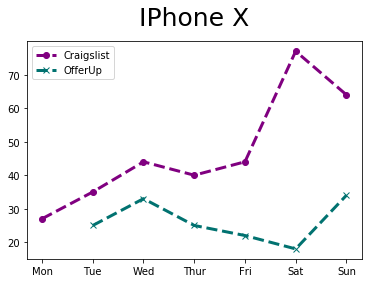

In [11]:
newCL = new_post_list
newOU = [None]+newpost_list[1]
fig = plt.figure()
plt.plot(newCL, color = pu, marker = 'o', linestyle='dashed', linewidth = 3.0, label = 'Craigslist')
plt.plot(newOU, color = gr, marker = 'x', linestyle='dashed', linewidth = 3.0, label = 'OfferUp')

plt.title('IPhone X',fontdict = {'fontsize' : 25},pad=16) # change model name
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.legend(loc = 'upper left')
plt.savefig('avail_ip',dpi=300)
plt.show()

In [13]:
new_post_list = []
update = ['2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29']
for i in range(len(df_list_ss)):
    new_post_list.append(newPost(df_list_ss[i], update[i]))

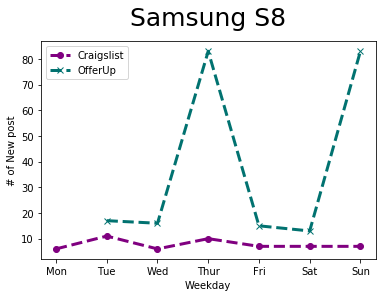

In [15]:
newCL = new_post_list
newOU = [None]+newpost_list[0]
fig = plt.figure()
plt.plot(newCL, color = pu, marker = 'o', linestyle='dashed', linewidth = 3.0, label = 'Craigslist')
plt.plot(newOU, color = gr, marker = 'x', linestyle='dashed', linewidth = 3.0, label = 'OfferUp')
plt.xlabel("Weekday")
plt.ylabel("# of New post")
plt.title('Samsung S8',fontdict = {'fontsize' : 25},pad=16) # change model name
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.savefig('avail_ss',dpi=300)
plt.show()

# Plot 4: Pie chart - contact Info

In [184]:
def contact(dt):
    '''
    return the number and portion of listings that have personal contact info
    '''
    t1 = dt[(dt.Price >= 100)]
    t2 = t1[(t1.Price <= 700)]    #filtering out listings with price out of price range
    all_listing = len(t2)
    t3 = t2[(t2.contactInfo)] 
    listing_with_contact = len(t3)
    portion = listing_with_contact / all_listing
    return all_listing, listing_with_contact

In [185]:
total = 0
count = 0
for df in df_list_ipx:
    x, y = contact(df)
    total += x
    count += y

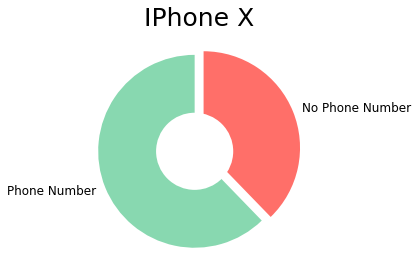

In [186]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Phone Number', 'No Phone Number'
sizes = [count,total-count ]
plt.title('IPhone X',fontdict = {'fontsize' : 25},pad=16)
explode = (0, 0.1)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion
plt.pie(sizes, explode=explode, labels=labels, colors = [ '#88d8b0','#ff6f69'],
        shadow=False, startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('contact_CL_ipx',dpi=300)
plt.show()



In [187]:
def contact(dt):
    '''
    return the number and portion of listings that have personal contact info
    '''
    t1 = dt[(dt.Price >= 200)]
    t2 = t1[(t1.Price <= 600)]    #filtering out listings with price out of price range
    all_listing = len(t2)
    t3 = t2[(t2.contactInfo)] 
    listing_with_contact = len(t3)
    portion = listing_with_contact / all_listing
    return all_listing, listing_with_contact

In [188]:
total = 0
count = 0
for df in df_list_ss:
    x, y = contact(df)
    total += x
    count += y

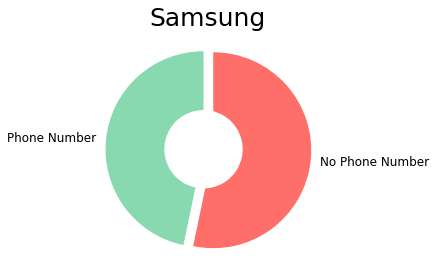

In [189]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Phone Number', 'No Phone Number'
sizes = [count,total-count ]
plt.title('Samsung',fontdict = {'fontsize' : 25},pad=16)
explode = (0, 0.1)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion
plt.pie(sizes, explode=explode, labels=labels, colors = [ '#88d8b0','#ff6f69'],
        shadow=False, startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('contact_CL_ss',dpi=300)
plt.show()

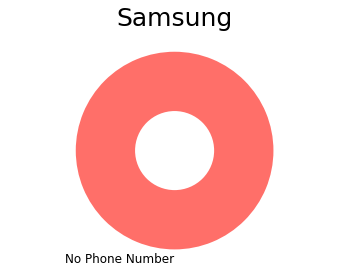

In [190]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No Phone Number']
sizes = [100]
plt.title('Samsung',fontdict = {'fontsize' : 25},pad=16)
#explode = (0)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion
plt.pie(sizes, explode=None, labels=labels, colors = [ '#ff6f69'],
        shadow=False, startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('contact_OU_ss',dpi=300)
plt.show()

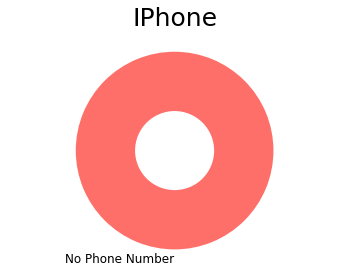

In [191]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No Phone Number']
sizes = [100]
plt.title('IPhone',fontdict = {'fontsize' : 25},pad=16)
explode = (0)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion
plt.pie(sizes, explode=None, labels=labels, colors = ['#ff6f69'],
        shadow=False, startangle=90,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('contact_OU_ip',dpi=300)
plt.show()

# Plot 5: Pie chart -- distance

In [162]:
def distance(dt):
    
    t1 = dt[(dt.Price >= 100)]
    t2 = t1[(t1.Price < 900)]
    under_ten = len(t2[(t2.distance < 10)])
    ten_to_fifty = len(t2[(t2.distance < 50)]) - under_ten
    fifty_above = len(t2[(t2.distance >= 50)])
    return [under_ten, ten_to_fifty, fifty_above] 

In [163]:
under_ten = 0
ten_to_fifty = 0
above_fifty = 0
for df in df_list_ipx:
    
    under_ten += distance(df)[0]
    ten_to_fifty += distance(df)[1]
    above_fifty += distance(df)[2]

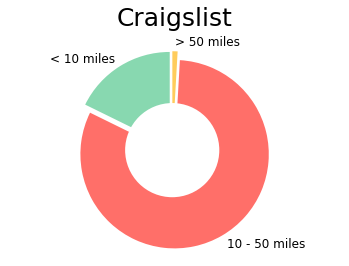

In [164]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '< 10 miles', '10 - 50 miles', '> 50 miles'
sizes = [under_ten, ten_to_fifty, above_fifty]
explode = (0.05,0.05,0.05)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = [ '#88d8b0','#ff6f69', '#ffcc5c'],
         startangle=90, pctdistance=0.85,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Craigslist",fontdict = {'fontsize' : 25},pad=16)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('distance_CL_ipx',dpi=300) 
plt.show()

In [165]:
under_ten = 0
ten_to_fifty = 0
above_fifty = 0
for df in df_list_ss:
    
    under_ten += distance(df)[0]
    ten_to_fifty += distance(df)[1]
    above_fifty += distance(df)[2]

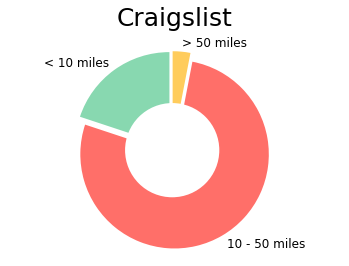

In [167]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '< 10 miles', '10 - 50 miles', '> 50 miles'
sizes = [under_ten, ten_to_fifty, above_fifty]
explode = (0.05,0.05,0.05)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = [ '#88d8b0', '#ff6f69','#ffcc5c',],
         startangle=90, pctdistance=0.85,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Craigslist",fontdict = {'fontsize' : 25},pad=16)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('distance_CL_ss',dpi=300)
plt.show()

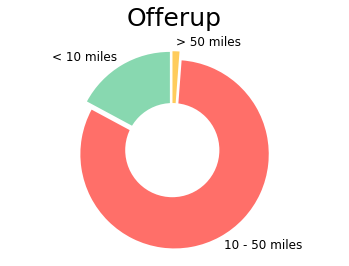

In [169]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '< 10 miles', '10 - 50 miles', '> 50 miles'
sizes = [dist_tuple_list[1][0],dist_tuple_list[1][1],dist_tuple_list[1][2]]
explode = (0.05,0.05,0.05)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = [ '#88d8b0','#ff6f69', '#ffcc5c'],
         startangle=90, pctdistance=0.85,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Offerup",fontdict = {'fontsize' : 25},pad=16)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('distance_OU_ipx',dpi=300) 
plt.show()

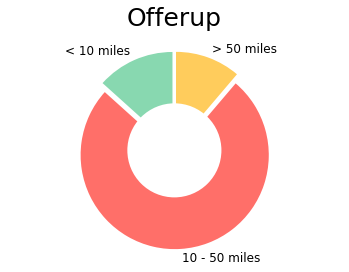

In [170]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '< 10 miles', '10 - 50 miles', '> 50 miles'
sizes = [dist_tuple_list[0][0],dist_tuple_list[0][1],dist_tuple_list[0][2]]
explode = (0.05,0.05,0.05)  # only "explode" the 2nd slice, depend on the size. Change this to be the largest portion

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors = [ '#88d8b0', '#ff6f69','#ffcc5c',],
         startangle=90, pctdistance=0.85,textprops={'fontsize': 12})
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Offerup",fontdict = {'fontsize' : 25},pad=16)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('distance_OU_ss',dpi=300)
plt.show()

# Average Price Per Week for Two Phone Models

In [171]:
print('the average price for Samsung S8 in a week is: ',avg_week_list[0])
print('the average price for IPhone in a week is: ',avg_week_list[1])

the average price for Samsung S8 in a week is:  260.94
the average price for IPhone in a week is:  517.81


# Rate of Useful Information of Scraping

In [172]:
print('the rate of useful information for Samsung S8 is: ',useful_ratio_list[0])
print('the rate of useful information for IPhone is: ',useful_ratio_list[1])

the rate of useful information for Samsung S8 is:  0.8744129116828532
the rate of useful information for IPhone is:  0.8548931741408071


# 10 Cell Phone Models 
# Average Price & Number of New Post on Both Websites

In [2]:
from process_offerup import compare_avg, compare_newly_post
import os
import pandas as pd
import copy
import numpy as np

path = './'
files = os.listdir(path)
files.sort(reverse=True)
compare_avg_list = []
for file in files:
    if file.split('_')[0] == 'B':
        ModelName = file.split('_')[2]
        compare_avg_list.append({"ModelName": ModelName,
                                 "AveragePrice_OU": compare_avg(path + file),
                                 "NewPost_OU": compare_newly_post(path + file)})
df_compare_avg = pd.DataFrame(compare_avg_list, columns=["ModelName", "AveragePrice_OU", "NewPost_OU"])
print(df_compare_avg)

cl_ip_df = pd.read_csv('./cl_10_model_data/iphone_model.csv')
cl_sam_df = pd.read_csv('./cl_10_model_data/samsung_model.csv')
cl_pixel_df = pd.read_csv('./cl_10_model_data/pixel_model.csv')

avgprice_ip = copy.copy(cl_ip_df)
avgprice_sam = copy.copy(cl_sam_df)
avgprice_pixel = copy.copy(cl_pixel_df)

newpost_ip = copy.copy(cl_ip_df)
newpost_sam = copy.copy(cl_sam_df)
newpost_pixel = copy.copy(cl_pixel_df)

avgprice_ip.drop(axis=1, columns='NewPost_CL', inplace=True)
addon = df_compare_avg['AveragePrice_OU'][6:10].reset_index()
avgprice_ip['AveragePrice_OU']=addon['AveragePrice_OU']
avgprice_ip.to_csv('./10_model_plot/avgprice_ip.csv')
print(avgprice_ip)

avgprice_sam.drop(axis=1, columns='NewPost_CL', inplace=True)
addon = df_compare_avg['AveragePrice_OU'][0:3].reset_index()
avgprice_sam['AveragePrice_OU']=addon['AveragePrice_OU']
avgprice_sam.to_csv('./10_model_plot/avgprice_sam.csv')
print(avgprice_sam)

avgprice_pixel.drop(axis=1, columns='NewPost_CL', inplace=True)
addon = df_compare_avg['AveragePrice_OU'][3:6].reset_index()
avgprice_pixel['AveragePrice_OU']=addon['AveragePrice_OU']
avgprice_pixel.to_csv('./10_model_plot/avgprice_pixel.csv')
print(avgprice_pixel)

newpost_ip.drop(axis=1, columns='AveragePrice_CL', inplace=True)
addon = df_compare_avg['NewPost_OU'][6:10].reset_index()
newpost_ip['NewPost_OU']=addon['NewPost_OU']
newpost_ip.to_csv('./10_model_plot/newpost_ip.csv')
print(newpost_ip)

newpost_sam.drop(axis=1, columns='AveragePrice_CL', inplace=True)
addon = df_compare_avg['NewPost_OU'][0:3].reset_index()
newpost_sam['NewPost_OU']=addon['NewPost_OU']
newpost_sam.to_csv('./10_model_plot/newpost_sam.csv')
print(newpost_sam)

newpost_pixel.drop(axis=1, columns='AveragePrice_CL', inplace=True)
addon = df_compare_avg['NewPost_OU'][3:6].reset_index()
newpost_pixel['NewPost_OU']=addon['NewPost_OU']
newpost_pixel.to_csv('./10_model_plot/newpost_pixel.csv')
print(newpost_pixel)

  ModelName  AveragePrice_OU  NewPost_OU
0        S9           338.73          22
1        S8           260.22          46
2        S7           163.46          14
3    Pixel4           484.79           2
4    Pixel3           384.70           4
5    Pixel2           222.32           4
6       IPX           516.67          35
7       IP7           254.91          67
8      IP6s           175.38          29
9       IP6           148.98          19
  IPhoneModel  AveragePrice_CL  AveragePrice_OU
0    IPhone X           351.75           516.67
1    IPhone 7           263.72           254.91
2   IPhone 6S           209.93           175.38
3    IPhone 6           161.10           148.98
  SamsungModel  AveragePrice_CL  AveragePrice_OU
0    Galaxy S9           340.97           338.73
1    Galaxy S8           283.82           260.22
2    Galaxy S7           171.64           163.46
  PixelModel  AveragePrice_CL  AveragePrice_OU
0     Pixel4           416.19           484.79
1     Pixel3       

<Figure size 432x288 with 0 Axes>

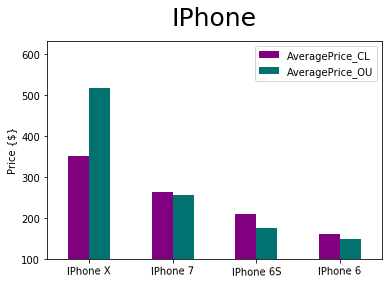

<Figure size 432x288 with 0 Axes>

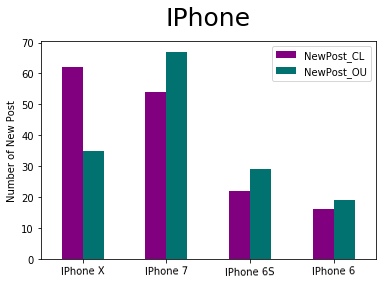

<Figure size 432x288 with 0 Axes>

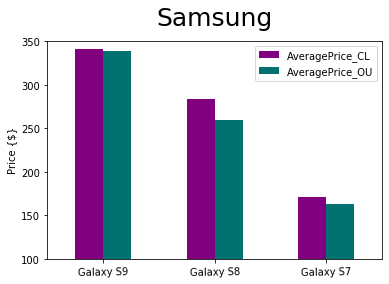

<Figure size 432x288 with 0 Axes>

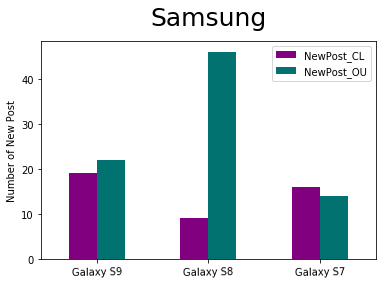

<Figure size 432x288 with 0 Axes>

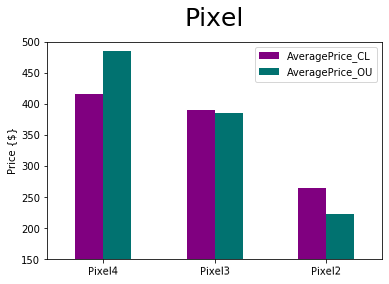

<Figure size 432x288 with 0 Axes>

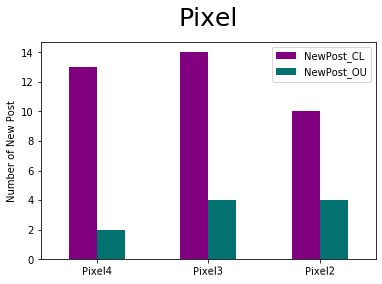

In [3]:
from plottest import draw_avg_price_bar,draw_new_post_bar
model_name = ['IPhone','Samsung','Pixel']
filepath = ['./10_model_plot/avgprice_ip.csv',
           './10_model_plot/avgprice_sam.csv',
           './10_model_plot/avgprice_pixel.csv',
           './10_model_plot/newpost_ip.csv',
           './10_model_plot/newpost_sam.csv',
           './10_model_plot/newpost_pixel.csv']
draw_avg_price_bar(model_name[0],filepath[0],'10_avg_ip',[100,630])
draw_new_post_bar(model_name[0],filepath[3],'10_np_ip')
draw_avg_price_bar(model_name[1],filepath[1],'10_avg_ss',[100,350])
draw_new_post_bar(model_name[1],filepath[4],'10_np_ss')
draw_avg_price_bar(model_name[2],filepath[2],'10_avg_pixel',[150,500])
draw_new_post_bar(model_name[2],filepath[5],'10_np_pixel')
